# TP 5

# Laplacian
We will study the Laplacian
$$ \nabla^2 C$$
where $C$ is a scalar field. 
The Laplacian operator is widely used in various fields such as physics, mathematics, and engineering. 
Here are some equations involving the Laplacian:

1. **Poisson's Equation**:
    $$ \nabla^2 \phi = \rho $$

2. **Heat Equation**:
    $$ \frac{\partial T}{\partial t} = \alpha \nabla^2 T $$

3. **Wave Equation**:
    $$ \frac{\partial^2 u}{\partial t^2} = c^2 \nabla^2 u $$

4. **Schrödinger Equation**:
    $$ i\hbar \frac{\partial \psi}{\partial t} = -\frac{\hbar^2}{2m} \nabla^2 \psi + V\psi $$

5. **Laplace's Equation**:
    $$ \nabla^2 \phi = 0 $$

6. **Poisson-Helmoltz**
$$ \nabla (D \nabla  A) - \lambda A = B$$

The work is divided in two parts
- A : The study of the diffusion equation in 1D
- B : The study of the diffusion equation in 2D using iterative methods


A Diffusion Equation with a Source Term

The Diffusion equation  can be written as:

$$ \frac{\partial C}{\partial t} = \alpha \frac{\partial^2 C}{\partial x^2} $$

where:
- $ C $ is a scalar field,
- $ t $ is the time,
- $ x $ is the spatial coordinate,
- $D$ is the diffusion coefficient

The initial condition is:

$ C(x, 0) = \sin(2 \pi x) $

The boundary conditions are typically set to zero (Dirichlet boundary conditions):

$$ C(0, t) = 0 $$
$$ C(L, t) = 0 $$

where $L$ is  the length of the domain.

### 1.1 Verification
Using sympy verify that
$$ C = \frac{C_{0} \pi e^{- \frac{x^{2}}{4 D t}}}{\sqrt{D t}} $$
is a solution

In [1]:
import sympy as sp

In [27]:
C0,pi,D,L= sp.symbols('C0,pi,D,L')
x, t = sp.symbols('x t')
f = C0*sp.exp(-D*pi*pi/L/L*t) * sp.sin(pi/L*x)
f

C0*exp(-D*pi**2*t/L**2)*sin(pi*x/L)

In [3]:
sp.diff(f,t) - D * sp.diff(sp.diff(f, x),x)

0

In [28]:
f = f.subs({C0:1, D:1, L:1,t:0.5, pi:sp.pi})
f

exp(-0.5*pi**2)*sin(pi*x)

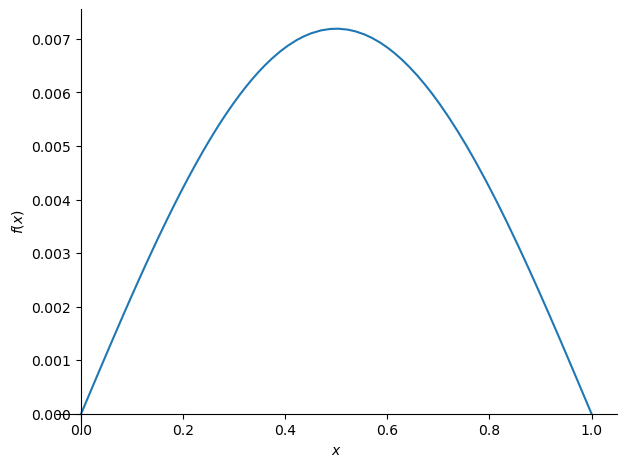

In [29]:
f = f.subs({C0:1, D:1, L:1,t:0.5, pi:sp.pi})
sp.plot(f, (x,0,1))

### Finite Differences Scheme

In the finite differences scheme, we discretize the spatial and temporal domains to approximate the derivatives in the heat equation. The spatial domain is divided into \( nx \) grid points with spacing \( dx \), and the time domain is divided into \( nt \) time steps with spacing \( dt \).

The diffusion equation with a source term is given by:

$$ \frac{\partial C}{\partial t} = D \frac{\partial^2 C}{\partial x^2} $$

Using finite differences, the second spatial derivative can be approximated as:

$$ \frac{\partial^2 C}{\partial x^2} \approx \frac{C_{i-1} - 2C_i + C_{i+1}}{\Delta_x ^2} $$

The forward Euler method is used for the time derivative:

$$ \frac{\partial C}{\partial t} \approx \frac{C^{n+1} - C^n}{\Delta t} $$

Combining these approximations, the update formula for the temperature at the next time step is:

$$ C_i^{n+1} = C_i^n + \frac{D  \Delta t}{\Delta_x ^2} \left( C_{i-1}^n - 2C_i^n + C_{i+1}^n  \right) $$

where:
- $C_i^n$ is the scalar at spatial position $ x_i$ and time $ t_n $,
- $D$ is the diffusion coefficient,


The initial condition is:

$$ C(x, 0) = \sin(2 \pi x) $$

The boundary conditions are typically set to zero (Dirichlet boundary conditions):

$$ C(0, t) = 0 $$
$$ C(L, t) = 0 $$

where $ L$ is the length of the domain.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [59]:
# Physical parameters
D = 1                  # Diffusion coefficient
L = 1.                         # Size of computational domain

# Grid parameters
nx = 100                        # number of grid points 
dx = L / (nx-1)                # grid spacing
x = np.linspace(0., L, nx)     # coordinates of grid points

# Time parameters
ti = 0.                         # initial time
tf = 5.                         # final time

dt = 0.0001
fourier = 0.49                  # Fourier number
dt = fourier*dx**2/D        # time step
print('dt =', dt)
nt = int((tf-ti) / dt)          # number of time steps

# Initial condition
T0 = np.sin(np.pi*x)          # initial condition


dt = 4.999489847974697e-05


In [ ]:
## porf
fourier = 0.49                  # Fourier number
dt = fourier*dx**2/alpha        # time step

In [34]:
def euler_step(u, f, dt, *args):
    """Returns the solution at the next time-step using 
    the forward Euler method.
    
    Parameters
    ----------
    u : array of floats
        solution at the current time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    args : optional arguments for the rhs function
    
    Returns
    -------
    unp1 : array of floats
        approximate solution at the next time step.
    """
    unp1 = u + dt * f(u, *args)
    return unp1

In [35]:
def rhs_centered(T, dx, alpha):
    """Returns the right-hand side of the 1D heat
    equation based on centered finite differences
    
    Parameters
    ----------
    T : array of floats
        solution at the current time-step.
    dx : float
        grid spacing
    alpha : float
        heat conductivity
    source : array of floats
        source term for the heat equation
    
    Returns
    -------
    f : array of floats
        right-hand side of the heat equation with
        Dirichlet boundary conditions implemented
    """
    nx = T.shape[0]
    f = np.empty(nx)
    
    f[1:-1] = alpha/dx**2 * (T[:-2] - 2*T[1:-1] + T[2:]) 
    f[0] = 0.
    f[-1] = 0.
    
    return f

dt = 0.0004999489847974697


In [45]:
def exact_solution(x,t, D=1, L=1):
    """Returns the exact solution of the 1D
    heat equation with heat source term sin(np.pi*x)
    and initial condition sin(2*np.pi*x)
    
    Parameters
    ----------
    x : array of floats
        grid points coordinates
    t: float
        time
    
    Returns
    -------
    f : array of floats
        exact solution
    """
    # Note the 'Pythonic' way to break the long line. You could
    # split a long line using a backlash (\) but the conventional
    # way is to embrace your code in parenthesis.
    #
    # For more info we refer you to PEP8:
    # https://www.python.org/dev/peps/pep-0008/#id19 
    f =  np.exp(-D*np.pi**2/L/L*t) * np.sin(np.pi/L*x)
    #f = (np.exp(-4*np.pi**2*alpha*t) * np.sin(2*np.pi*x)
    #  + 2.0*(1-np.exp(-np.pi**2*alpha*t)) * np.sin(np.pi*x) 
    #  / (np.pi**2*alpha))
    
    return f

In [60]:
T = np.empty((nt+1, nx))
T[0] = T0.copy()

for i in range(nt):
    T[i+1] = euler_step(T[i], rhs_centered, dt, dx, D)

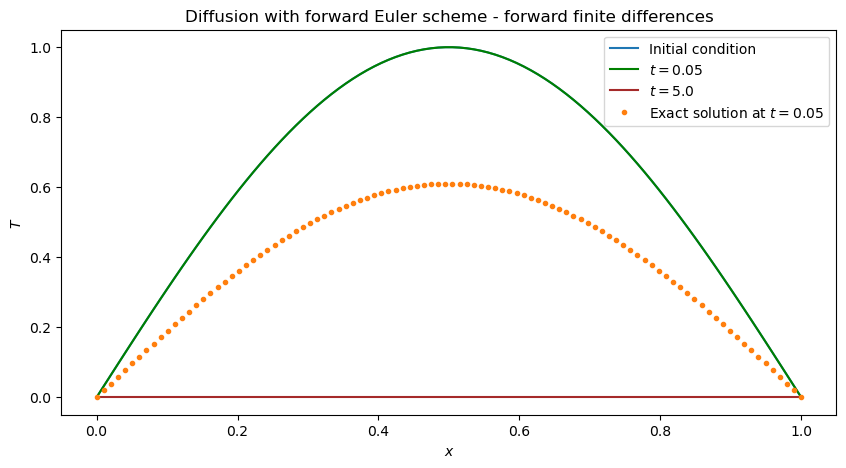

In [80]:
# plot the solution at several times
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, T[0], label='Initial condition')
ax.plot(x, T[int(0.05/dt)], color='green', label='$t=0.05$')
ax.plot(x, T[-1], color='brown', label=f'$t={tf}$')
ax.plot(x, exact_solution(x, 0.05, D), '.', label='Exact solution at $t=0.05$')


ax.set_xlabel('$x$')
ax.set_ylabel('$T$')
ax.set_title('Diffusion with forward Euler scheme'
             ' - forward finite differences')
ax.legend();

### Implicit Method for the Diffusion Equation

In the implicit method, we discretize the spatial and temporal domains to approximate the derivatives in the diffusion equation. The spatial domain is divided into \( nx \) grid points with spacing \( dx \), and the time domain is divided into \( nt \) time steps with spacing \( dt \).

The diffusion equation is given by:

$$ \frac{\partial C}{\partial t} = D \frac{\partial^2 C}{\partial x^2} $$

Using finite differences, the second spatial derivative can be approximated as:

$$ \frac{\partial^2 C}{\partial x^2} \approx \frac{C_{i-1} - 2C_i + C_{i+1}}{\Delta x^2} $$

The backward Euler method is used for the time derivative:

$$ \frac{\partial C}{\partial t} \approx \frac{C^{n+1} - C^n}{\Delta t} $$

Combining these approximations, the update formula for the temperature at the next time step is:

$$ C_i^{n+1} - \frac{D \Delta t}{\Delta x^2} \left( C_{i-1}^{n+1} - 2C_i^{n+1} + C_{i+1}^{n+1} \right) = C_i^n $$

This can be rearranged into a system of linear equations:

$$ \left( 1 + 2\frac{D \Delta t}{\Delta x^2} \right) C_i^{n+1} - \frac{D \Delta t}{\Delta x^2} \left( C_{i-1}^{n+1} + C_{i+1}^{n+1} \right) = C_i^n $$

This system *A x = b* can be solved using matrix methods, where the matrix represents the coefficients of $ C_i^{n+1}$ and the right-hand side represents $C_i^n$.

The initial condition is:

$$ C(x, 0) = \sin(2 \pi x) $$

The boundary conditions are typically set to zero (Dirichlet boundary conditions):

$$ C(0, t) = 0 $$
$$ C(L, t) = 0 $$

where $ L $ is the length of the domain.

In [69]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

In [81]:
dt = 0.1
r = D * dt / dx**2
diagonals = [-(1 + 2 * r) * np.ones(nx), r * np.ones(nx - 1), r * np.ones(nx - 1)]
offsets = [0, -1, 1]
A = diags(diagonals, offsets, shape=(nx, nx)).toarray


In [76]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

def solve_implicit(A, B, nx):
    """
    Solves the linear system A x = B using sparse matrix representation.

    Parameters
    ----------
    A_diags : list of arrays
        Diagonals of the sparse matrix A.
    B : array of floats
        Right-hand side vector.
    nx : integer
        Number of grid points.

    Returns
    -------
    x : array of floats
        Solution vector.
    """

    B[0] = 0.
    B[-1] = 0.
    Ad = diags(A_diags, [0, -1, 1], shape=(nx, nx))
    x = spsolve(Ad, B)
    
    return x


In [79]:
T = np.empty((nt+1, nx))
T[0] = T0.copy()

for i in range(nt):
    T[i+1] = solve_implicit(A,T[i])

/home/jmf/anaconda3/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


In [16]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

def solve_sparse_system(A_diags, B, nx):
    """
    Solves the linear system A x = B using sparse matrix representation.

    Parameters
    ----------
    A_diags : list of arrays
        Diagonals of the sparse matrix A.
    B : array of floats
        Right-hand side vector.
    nx : integer
        Number of grid points.

    Returns
    -------
    x : array of floats
        Solution vector.
    """
    # Create the sparse matrix A using the diagonals
    A = diags(A_diags, [0, -1, 1], shape=(nx, nx))
    
    # Solve the linear system
    x = spsolve(A, B)
    
    return x

# Example usage
A_diags = [-2 * np.ones(nx), np.ones(nx - 1), np.ones(nx - 1)]
B = T0  # Example right-hand side vector
solution = solve_sparse_system(A_diags, B, nx)
print(solution)

In [17]:
# Physical parameters
alpha = 0.1                    # Heat transfer coefficient
lx = 1.                        # Size of computational domain
ti = 0.0                       # Initial time
tf = 5.0                       # Final time

# Grid parameters
nx = 513                       # number of grid points
dx = lx / (nx-1)               # grid spacing
x = np.linspace(0., lx, nx)    # coordinates of grid points

In [18]:
# Time parameters
fourier = 0.49                      # Fourier number
dt = fourier*dx**2/alpha            # time step
nt = int((tf-ti) / dt)              # number of time steps

# Solution parameters
T0 = np.sin(2*np.pi*x)              # initial condition
source = 2*np.sin(np.pi*x)          # heat source term
sol = exact_solution(x, tf, alpha)  # Exact solution

In [19]:
T = np.empty((nt+1, nx)) # Allocate storage for the solution
T[0] = T0.copy()         # Set the initial condition

In [20]:
%%timeit
for i in range(nt):
    T[i+1] = euler_step(T[i], rhs_heat_centered, dt, dx, alpha, source)

The slowest run took 5.10 times longer than the fastest. This could mean that an intermediate result is being cached.
5.34 s ± 2.5 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


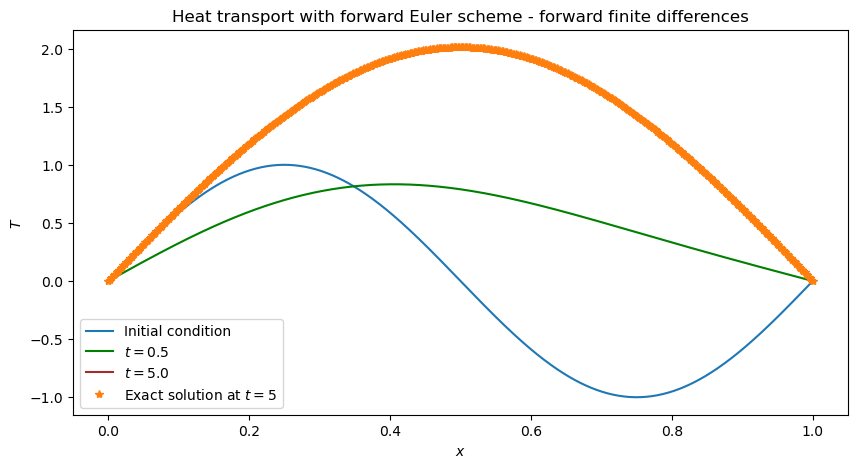

In [21]:
# plot the solution at several times
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, T[0], label='Initial condition')
ax.plot(x, T[int(0.5/dt)], color='green', label='$t=0.5$')
ax.plot(x, T[-1], color='brown', label=f'$t={tf}$')
ax.plot(x, exact_solution(x, 5.0, alpha), '*', label='Exact solution at $t=5$')


ax.set_xlabel('$x$')
ax.set_ylabel('$T$')
ax.set_title('Heat transport with forward Euler scheme'
             ' - forward finite differences')
ax.legend();

## Matrix
### Euler

In [31]:
from scipy.sparse import diags

In [29]:
def d2_mat_dirichlet(nx, dx):
    """
    Constructs the centered second-order accurate second-order derivative for
    Dirichlet boundary conditions.

    Parameters
    ----------
    nx : integer
        number of grid points
    dx : float
        grid spacing

    Returns
    -------
    d2mat : numpy.ndarray
        matrix to compute the centered second-order accurate first-order deri-
        vative with Dirichlet boundary conditions on both side of the interval
    """
    # We construct a sequence of main diagonal elements,
    diagonals = [[1.], [-2.], [1.]]
    # and a sequence of positions of the diagonal entries relative to the main
    # diagonal.
    offsets = [-1, 0, 1]

    # Call to the diags routine; note that diags return a representation of the
    # array; to explicitly obtain its ndarray realisation, the call to .toarray()
    # is needed. Note how the matrix has dimensions (nx-2)*(nx-2).
    d2mat = diags(diagonals, offsets, shape=(nx-2,nx-2)).toarray()

    # Return the final array divided by the grid spacing **2.
    return d2mat / dx**2

In [32]:
# d^2 / dx^2 matrix with Dirichlet boundary conditions
D2 = d2_mat_dirichlet(nx, dx)     

# I+A matrix
M = np.eye(nx-2) + alpha*dt*D2

In [33]:
T[0] = T0.copy()         # Set the initial condition

In [34]:
%%timeit
for i in range(nt):
    T[i+1, 1:-1] = np.dot(M, T[i, 1:-1]) + source[1:-1]*dt

# Set the boundary values
T[-1,0] = 0.
T[-1,-1] = 0.

25.7 s ± 2.01 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


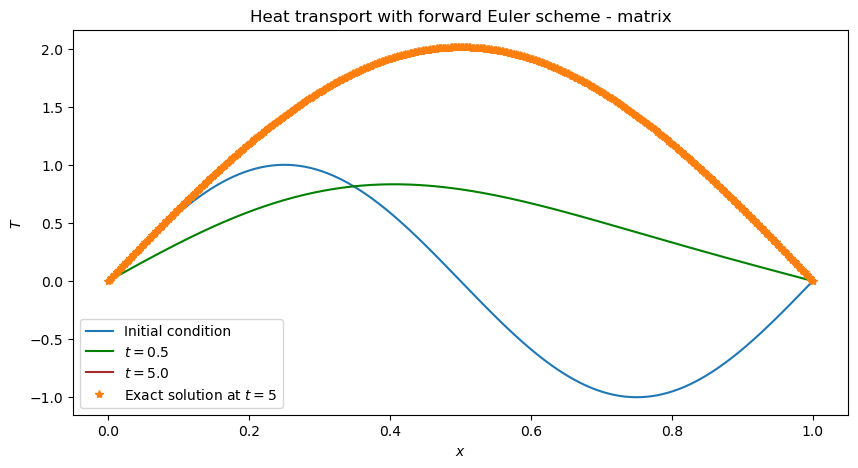

In [37]:
# plot the solution at several times
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, T[0], label='Initial condition')
ax.plot(x, T[int(0.5/dt)], color='green', label='$t=0.5$')
ax.plot(x, T[-1], color='brown', label=f'$t={tf}$')
ax.plot(x, exact_solution(x, 5.0, alpha), '*', label='Exact solution at $t=5$')


ax.set_xlabel('$x$')
ax.set_ylabel('$T$')
ax.set_title('Heat transport with forward Euler scheme'
             ' - matrix')
ax.legend();

In [22]:
from scipy.sparse import diags

def tridiagonal_laplacian(nx, dx):
    """
    Constructs the tridiagonal matrix for the Laplacian operator with
    Dirichlet boundary conditions.

    Parameters
    ----------
    nx : integer
        Number of grid points.
    dx : float
        Grid spacing.

    Returns
    -------
    laplacian : scipy.sparse.dia_matrix
        Tridiagonal matrix representing the Laplacian operator.
    """
    diagonals = [-2 * np.ones(nx), np.ones(nx - 1), np.ones(nx - 1)]
    offsets = [0, -1, 1]
    laplacian = diags(diagonals, offsets, shape=(nx, nx)).toarray()
    return laplacian / dx**2

# Example usage
laplacian_matrix = tridiagonal_laplacian(nx, dx)
print(laplacian_matrix)

[[-524288.  262144.       0. ...       0.       0.       0.]
 [ 262144. -524288.  262144. ...       0.       0.       0.]
 [      0.  262144. -524288. ...       0.       0.       0.]
 ...
 [      0.       0.       0. ... -524288.  262144.       0.]
 [      0.       0.       0. ...  262144. -524288.  262144.]
 [      0.       0.       0. ...       0.  262144. -524288.]]


In [23]:
from scipy.sparse.linalg import spsolve

# Assuming A is your sparse matrix and B is your right-hand side vector
A = diags([-2 * np.ones(nx), np.ones(nx - 1), np.ones(nx - 1)], [0, -1, 1], shape=(nx, nx))
B = T0  # Example right-hand side vector

# Solve the linear system
x = spsolve(A, B)

print(x)

[-8.11692409e+01 -1.62338482e+02 -2.43495451e+02 -3.24627879e+02
 -4.05723500e+02 -4.86770053e+02 -5.67755286e+02 -6.48666954e+02
 -7.29492824e+02 -8.10220678e+02 -8.90838309e+02 -9.71333529e+02
 -1.05169417e+03 -1.13190808e+03 -1.21196313e+03 -1.29184722e+03
 -1.37154827e+03 -1.45105423e+03 -1.53035308e+03 -1.60943282e+03
 -1.68828151e+03 -1.76688722e+03 -1.84523806e+03 -1.92332219e+03
 -2.00112780e+03 -2.07864313e+03 -2.15585645e+03 -2.23275608e+03
 -2.30933041e+03 -2.38556785e+03 -2.46145687e+03 -2.53698599e+03
 -2.61214380e+03 -2.68691892e+03 -2.76130005e+03 -2.83527594e+03
 -2.90883540e+03 -2.98196731e+03 -3.05466060e+03 -3.12690428e+03
 -3.19868741e+03 -3.26999916e+03 -3.34082871e+03 -3.41116538e+03
 -3.48099850e+03 -3.55031752e+03 -3.61911195e+03 -3.68737138e+03
 -3.75508548e+03 -3.82224402e+03 -3.88883683e+03 -3.95485382e+03
 -4.02028502e+03 -4.08512052e+03 -4.14935051e+03 -4.21296527e+03
 -4.27595516e+03 -4.33831067e+03 -4.40002234e+03 -4.46108084e+03
 -4.52147692e+03 -4.58120

/home/jmf/anaconda3/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
